##Загружаем датасет и предобученные вектора

In [0]:
!wget http://178.62.190.77/messages_edo.csv.zip
!wget http://178.62.190.77/ft_native_300_ru_wiki_lenta_lower_case.vec.zip #http://files.deeppavlov.ai/embeddings/ft_native_300_ru_wiki_lenta_lower_case/ft_native_300_ru_wiki_lenta_lower_case.vec

!unzip messages_edo.csv.zip
!unzip ft_native_300_ru_wiki_lenta_lower_case.vec.zip

--2019-08-11 04:54:58--  http://178.62.190.77/messages_edo.csv.zip
Connecting to 178.62.190.77:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83197238 (79M) [application/zip]
Saving to: ‘messages_edo.csv.zip’

messages_edo.csv.zi 100%[===================>]  79.34M  21.8MB/s    in 3.6s    

2019-08-11 04:55:02 (21.8 MB/s) - ‘messages_edo.csv.zip’ saved [83197238/83197238]

--2019-08-11 04:55:03--  http://178.62.190.77/ft_native_300_ru_wiki_lenta_lower_case.vec.zip
Connecting to 178.62.190.77:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1549793168 (1.4G) [application/zip]
Saving to: ‘ft_native_300_ru_wiki_lenta_lower_case.vec.zip’

ft_native_300_ru_wi 100%[===================>]   1.44G  27.3MB/s    in 53s     

2019-08-11 04:55:56 (27.7 MB/s) - ‘ft_native_300_ru_wiki_lenta_lower_case.vec.zip’ saved [1549793168/1549793168]

Archive:  messages_edo.csv.zip
  inflating: messages_edo.csv        
Archive:  ft_native_300_ru_wiki_lenta_lower_ca

In [0]:
!ls -la

total 6096492
drwxr-xr-x 1 root root       4096 Aug 11 04:56 .
drwxr-xr-x 1 root root       4096 Aug 11 04:54 ..
drwxr-xr-x 1 root root       4096 Aug  7 16:05 .config
-rw-r--r-- 1 root root 4140857273 Jan 11  2018 ft_native_300_ru_wiki_lenta_lower_case.vec
-rw-r--r-- 1 root root 1549793168 Aug 10 13:43 ft_native_300_ru_wiki_lenta_lower_case.vec.zip
-rw-rw-r-- 1 root root  468926539 Jul 16 10:32 messages_edo.csv
-rw-r--r-- 1 root root   83197238 Aug  7 01:14 messages_edo.csv.zip
drwxr-xr-x 1 root root       4096 Aug  2 16:06 sample_data


In [0]:
!tail messages_edo.csv

Прошу обратить Ваше внимание решить проблему метрах от дома по адресу Рижский строящсгося нерехода через железную дорогу Ярославского направления из под земли течет вода кторая заливает нроезжую часть Образовывается лед огромные лужп Сколько тысяч кубометров воды утекает ннкуда автомобильные аварии из-за льда;Благоустройство территорий;Содержание, эксплуатация, благоустройство и ремонт придомовых территорий;Подтопление придомовой территории (состояние сточной системы, дренажной системы, водоотводы и прочее);
записаться на прием кдирекрору Мосгортура управления или начальнику Тагохи наИрина уапехч тз Тагохина Ирина Аександровна ЗЗ марта мы подали заявку нальготную семейную пуевку какмалообеспеченная семья вмарте Вбазеданных соц защиты Москвы мы есть Всвязисо Просим включить насвовторой этап Заявление мы подали всрок Нозаметили мы это марта гдук;Семейная и молодежная политика;Организация отдыха и оздоровления детей города Москвы;Предоставление путевки (сертификата) на детский отдых и озд

In [0]:
!tail ft_native_300_ru_wiki_lenta_lower_case.vec

сансского -0.008377 -0.13181 -0.33843 -0.31155 -0.13771 -0.079656 0.36111 -0.19996 -0.40225 0.43102 -0.26469 -0.2411 -0.14767 0.31819 0.12036 0.28446 0.029462 -0.21338 0.18999 -0.021112 -0.50877 0.22132 -0.1661 -0.10579 0.25681 -0.65075 -0.47582 -0.11878 -0.0066971 -0.15692 0.11443 -0.51562 -0.18049 0.36931 -0.48781 -0.13876 -0.022828 -0.11593 -0.26189 -0.12683 -0.14821 -0.15788 0.19943 -0.5213 -0.20477 -0.1846 -0.15542 0.14629 0.26768 0.045027 -0.0071586 -0.24652 0.25006 -0.30182 0.054287 0.28022 -0.11926 0.20768 -0.13938 -0.075545 -0.11908 -0.1918 0.1315 -0.009417 0.23067 0.33193 0.20502 -0.081316 -0.1755 -0.23124 0.30187 0.051566 0.25894 -0.10041 -0.11284 0.3285 0.17566 -0.21089 -0.13063 0.19271 0.17518 -0.12041 0.3135 0.035292 0.005399 -0.093262 -0.24835 -0.30259 -0.060531 0.022829 0.28235 0.61678 0.48746 0.068888 -0.34779 0.17476 -0.18497 -0.073412 0.33574 0.46808 0.26903 0.0065297 0.22019 0.295 0.28854 -0.44602 -0.043299 -0.13304 -0.13948 -0.3066 0.089913 -0.079736 -0.23175 -0.10

In [0]:
import pandas as pd
import numpy as np

data = pd.read_csv('messages_edo.csv', sep=';')
data = data.sample(frac=1)

threshold = 5000

data.sample(3)

,text,category_1,category_2,category_3,category_4
27440,Директору ГБУ Жилищник района Ростокино Пантюх...,Жилищно-коммунальное хозяйство,Оплата жилищно-коммунальных услуг,"Начисления, оплата и расчеты жилищно-коммуналь...",Начисления и расчеты за коммунальные услуги по...
42548,ГОСУДАРСТВЕННАЯ ЖИЛИЩНАЯ ИНСПЕКЦИЯ ГОРОДА МОСК...,Жилищно-коммунальное хозяйство,Содержание и текущий ремонт жилых помещений в ...,Системы жизнеобеспечения в многоквартирном дом...,Техническое состояние инженерных систем жизнео...
64313,Коррупция Мэру Мо сквы Об ий журнал раб Ждано ...,Капитальный ремонт многоквартирных домов,Региональная программа капитального ремонта об...,Качество проведения работ по капитальному ремо...,Качество проведения работ по капитальному ремо...


In [0]:
data.shape[0], data.category_1.nunique()

(172113, 758)

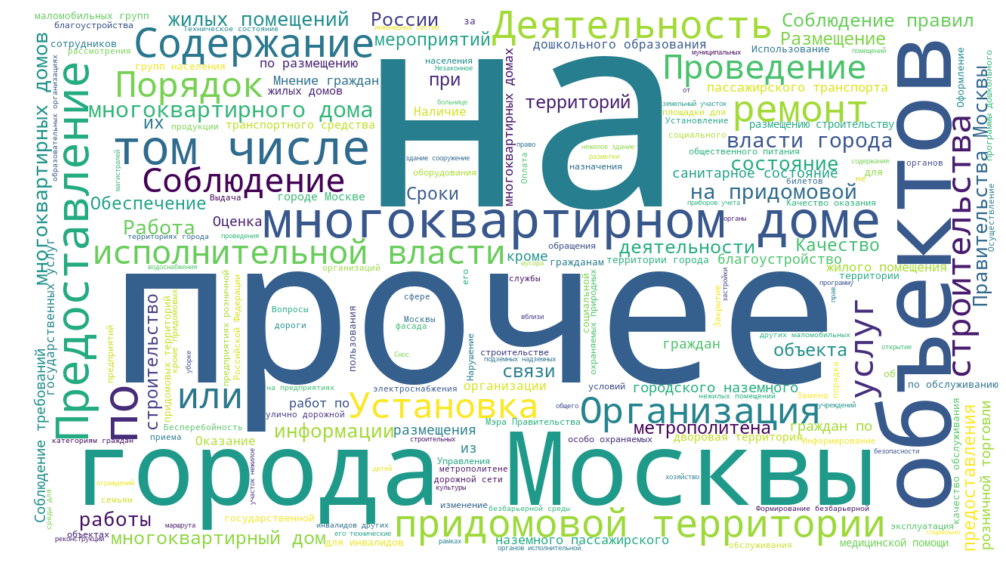

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

wordcloud = WordCloud(background_color="white", width=1280, height=720).generate(' '.join(pd.Series(data.category_1.unique())))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
data.category_1.unique()

array(['Благоустройство территорий', 'Жилищно-коммунальное хозяйство',
       'Образование', 'Капитальный ремонт многоквартирных домов',
       'Транспорт',
       'Деятельность органов исполнительной власти города Москвы',
       'Работа с обращениями граждан', 'Градостроительство и архитектура',
       'Топливно-энергетическое хозяйство', 'Здравоохранение',
       'Физическая культура и спорт', 'Реклама',
       'Природопользование и охрана окружающей среды',
       'Жилищная политика', 'Труд и занятость',
       'Смена организации, управляющей многоквартирным домом (передача управления)-',
       'Содержание животных, ветеринария',
       'Правосудие, прокуратура, адвокатура, нотариат, исполнение наказаний',
       'Организация плоскостных парковок (размещение)-',
       'Бесперебойность водоснабжения и его технические параметры (давление, температура и прочее) в многоквартирном доме-',
       'Торговля и услуги',
       'Гаражное хозяйство, парковки, транспортно-пересадочные узлы',

In [0]:
# количество образцов для категории
data = data.merge(data.groupby('category_1')['text'].count().reset_index(name = 'category_1_counter'), how = 'left')
data.shape

(172113, 6)

In [0]:
data[data.category_1_counter > threshold].category_1.nunique()

6

In [0]:
data = data[data.category_1_counter > threshold]

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data.category_1.values)
data['category_1_encoded'] = encoder.transform(data.category_1.values)
encoder.classes_

array(['Благоустройство территорий', 'Градостроительство и архитектура',
       'Жилищно-коммунальное хозяйство', 'Здравоохранение', 'Образование',
       'Транспорт'], dtype=object)

In [0]:
num_labels = data['category_1_encoded'].nunique()

data.shape[0], num_labels

(118615, 6)

In [0]:
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import Callback
from IPython.display import clear_output
from tensorflow.keras import backend as K


class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.inter_dim = []
        self.val_inter_dim = []
        self.logits = []
        self.val_logits = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))        
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

        self.i += 1
        f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

        clear_output(wait=True)

        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss:" +
                 str(round(logs.get('loss'), 3)))
        ax1.plot(self.x, self.val_losses, label="v_loss:" +
                 str(round(logs.get('val_loss'), 3)))
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="acc:" +
                 str(round(logs.get('acc'), 3)))
        ax2.plot(self.x, self.val_acc, label="v_acc:" +
                 str(round(logs.get('val_acc'), 3)))
        ax2.legend()

        #plt.savefig("fig")
        plt.show();


plot = PlotLearning()


In [0]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

max_features = 50000
embedding_dim = 300
max_length = 220
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=data.shape[0]
test_portion=.1

sentences = data.text.values

from keras.utils import np_utils
labels = np_utils.to_categorical(data.category_1_encoded)

Using TensorFlow backend.


In [0]:
def from_categorical(x):
  return encoder.classes_[np.argmax(x, axis=None, out=None)]

In [0]:
print(len(sentences))
print(sentences[1])
print(from_categorical(labels[1]))

118615
Уже который год снег во дворе чистится крайне плохо нерегулярно Инженер по благоустройству игнорирует устные обращения При обращении на портал Наш город происходят подлоги сроки срываются самое малое снег чистится только том месте которое видно на фотографии Дворники на устные жалобы говорят куда нам снег девать Парковка во дворе дома последний раз чистилась ноябре месяце пешеходные дорожки вокруг детского сада чистились раза за этот год Парковочные карманы используются для складирования снега большая часть которого не вывозилась из двора начала зимы коляской ходить невозможно приходится брать ребенка на руки тащить коляску за собой
Жилищно-коммунальное хозяйство


In [0]:
%%time

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index) + 1

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

CPU times: user 55.2 s, sys: 320 ms, total: 55.5 s
Wall time: 55.5 s


In [0]:
print(vocab_size)

516833


##Dense

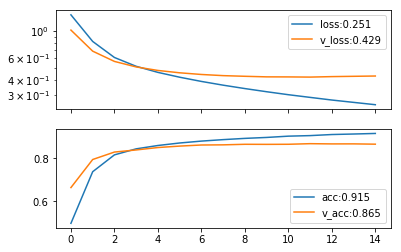

106754/106754 [==============================] - 4s 40us/sample - loss: 0.2506 - acc: 0.9145 - val_loss: 0.4295 - val_acc: 0.8649


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(num_labels, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

num_epochs = 20
batch_size = 512
history = model.fit(training_sequences, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_sequences, test_labels), 
                    batch_size=batch_size, 
                    verbose=1, 
                    callbacks=[early_stopping, plot])

##GRU

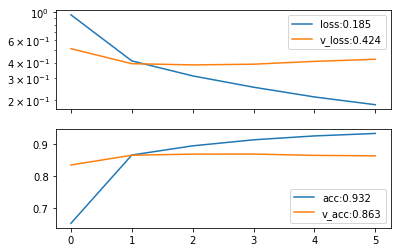

106754/106754 [==============================] - 15s 141us/sample - loss: 0.1852 - acc: 0.9320 - val_loss: 0.4243 - val_acc: 0.8626


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.CuDNNGRU(40, return_sequences = True)),  
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(num_labels, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

num_epochs = 20
batch_size = 512
history = model.fit(training_sequences, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_sequences, test_labels), 
                    batch_size=batch_size, 
                    verbose=1, 
                    callbacks=[early_stopping, plot])

##CNN

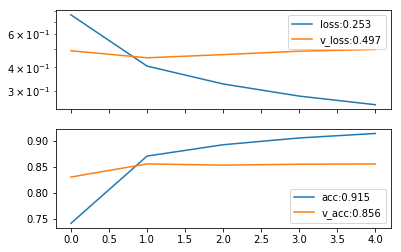

106754/106754 [==============================] - 11s 100us/sample - loss: 0.2530 - acc: 0.9147 - val_loss: 0.4973 - val_acc: 0.8558


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),  
    tf.keras.layers.Dense(num_labels, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

num_epochs = 20
batch_size = 256
history = model.fit(training_sequences, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_sequences, test_labels), 
                    batch_size=batch_size, 
                    verbose=1, 
                    callbacks=[early_stopping, plot])

##CNN + GRU

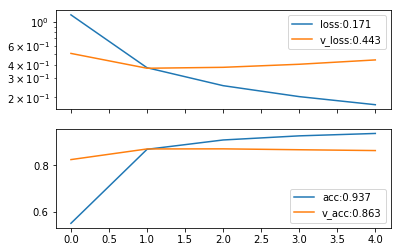

106754/106754 [==============================] - 25s 230us/sample - loss: 0.1708 - acc: 0.9365 - val_loss: 0.4427 - val_acc: 0.8633


In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.Conv1D(64, 5, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.GRU(64))
model.add(tf.keras.layers.Dense(num_labels, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

num_epochs = 20
batch_size = 512
history = model.fit(training_sequences, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_sequences, test_labels), 
                    batch_size=batch_size, 
                    verbose=1, 
                    callbacks=[early_stopping, plot])

##Финальная модель

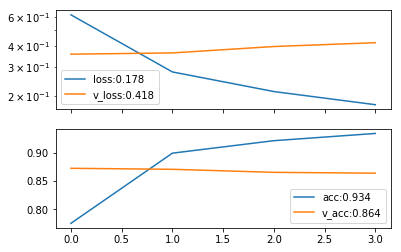

106754/106754 [==============================] - 65s 608us/sample - loss: 0.1776 - acc: 0.9335 - val_loss: 0.4185 - val_acc: 0.8638


In [0]:
from tensorflow.keras.layers import Input, Dense, Embedding, CuDNNGRU, CuDNNLSTM, Conv1D, SpatialDropout1D, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping

inp = Input(shape = (max_length,))
x = Embedding(max_features, embedding_dim)(inp)
x1 = SpatialDropout1D(.2)(x)
x = Bidirectional(CuDNNGRU(128, return_sequences = True))(x1)
x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
y = Bidirectional(CuDNNLSTM(128, return_sequences = True))(x1)
y = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(y)
avg_pool1 = GlobalAveragePooling1D()(x)
max_pool1 = GlobalMaxPooling1D()(x)
avg_pool2 = GlobalAveragePooling1D()(y)
max_pool2 = GlobalMaxPooling1D()(y)
x = concatenate([avg_pool1, max_pool1, avg_pool2, max_pool2])
x = Dense(num_labels, activation = "softmax")(x)
model = Model(inputs = inp, outputs = x)
model.compile(loss = "categorical_crossentropy", optimizer = 'Adam', metrics = ["accuracy"])
model.summary()

early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

num_epochs = 20
batch_size = 512
history = model.fit(training_sequences, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_sequences, test_labels), 
                    batch_size=batch_size, 
                    verbose=1, 
                    callbacks=[early_stopping, plot])

## Финальная модель + fasttext


> Indented block



In [0]:
%%time

EMBEDDING_FILE = 'ft_native_300_ru_wiki_lenta_lower_case.vec'

def get_coefs(word, *arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

CPU times: user 1min 48s, sys: 3 s, total: 1min 51s
Wall time: 1min 49s


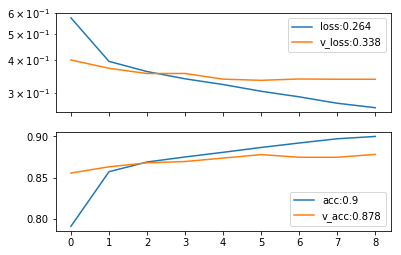

106754/106754 [==============================] - 58s 546us/sample - loss: 0.2638 - acc: 0.9000 - val_loss: 0.3377 - val_acc: 0.8783


In [0]:
inp = Input(shape = (max_length,))
x = Embedding(max_features, embedding_dim, weights = [embedding_matrix], trainable = False)(inp)
x1 = SpatialDropout1D(.2)(x)
x = Bidirectional(CuDNNGRU(128, return_sequences = True))(x1)
x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
y = Bidirectional(CuDNNLSTM(128, return_sequences = True))(x1)
y = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(y)
avg_pool1 = GlobalAveragePooling1D()(x)
max_pool1 = GlobalMaxPooling1D()(x)
avg_pool2 = GlobalAveragePooling1D()(y)
max_pool2 = GlobalMaxPooling1D()(y)
x = concatenate([avg_pool1, max_pool1, avg_pool2, max_pool2])
x = Dense(num_labels, activation = "softmax")(x)
model = Model(inputs = inp, outputs = x)
model.compile(loss = "categorical_crossentropy", optimizer = 'Adam', metrics = ["accuracy"])
model.summary()

early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

num_epochs = 50
batch_size = 512
history = model.fit(training_sequences, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_sequences, test_labels), 
                    batch_size=batch_size, 
                    verbose=1, 
                    callbacks=[early_stopping, plot])

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 220)]        0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 220, 300)     15000000    input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_2 (SpatialDro (None, 220, 300)     0           embedding_7[0][0]                
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 220, 256)     330240      spatial_dropout1d_2[0][0]        
____________________________________________________________________________________________

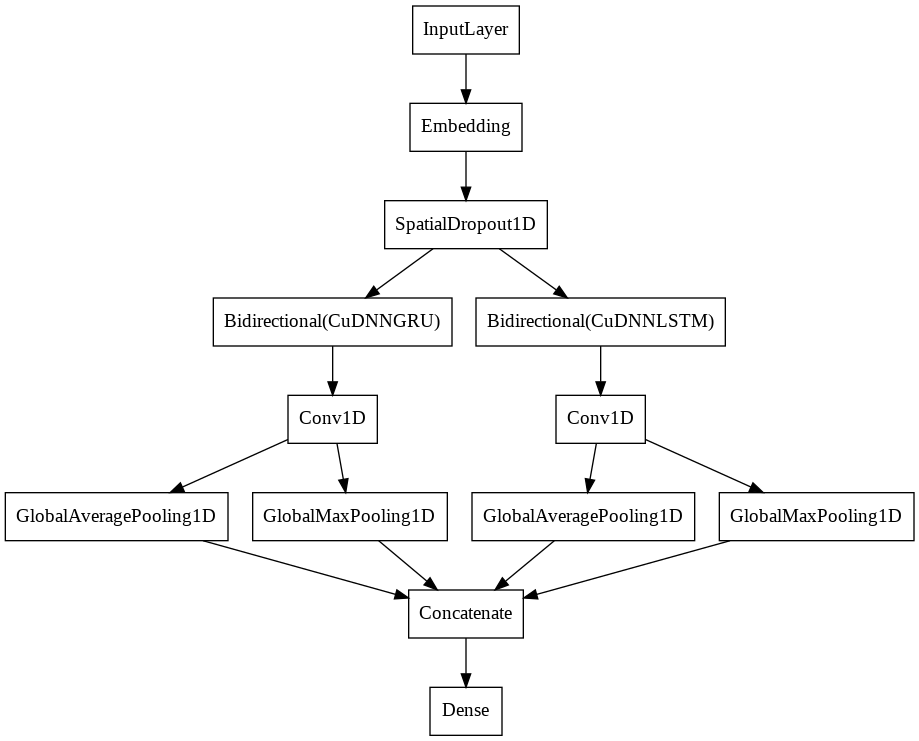

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_layer_names=False)

from IPython.display import Image
Image(filename='model.png', width=800) 